In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("Shape of X_train: ", X_train_full.shape)
print("Shape of y_train: ", y_train_full.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


In [4]:
X_train_full = X_train_full.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train_full = X_train_full.astype('float32')
y_train_full = y_train_full.astype('float32')

In [6]:
X_train, X_val = X_train_full[5000:], X_train_full[:5000]
y_train, y_val = y_train_full[5000:], y_train_full[:5000]

In [17]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard = TensorBoard(run_logdir)
model = Sequential()
model.add(Flatten(input_shape = [28,28,1]))
model.add(Dense(300, activation = tf.keras.activations.relu))
model.add(Dense(100, activation = tf.keras.activations.relu))
model.add(Dense(10, activation = tf.keras.activations.softmax))
#Sparse_categorical_crossentropy = works best with data that is NOT one_hot_encoded
model.compile(optimizer = tf.keras.optimizers.Adam(lr = .001), loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy']) 
history = model.fit(X_train, y_train, batch_size = 64, epochs = 5, validation_data = (X_val, y_val), callbacks = [tensorboard])

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 2s 39us/sample - loss: 3.8465 - accuracy: 0.7558 - val_loss: 0.7438 - val_accuracy: 0.8044
Epoch 2/5
55000/55000 [==============================] - 2s 34us/sample - loss: 0.5990 - accuracy: 0.8137 - val_loss: 0.4941 - val_accuracy: 0.8414
Epoch 3/5
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4613 - accuracy: 0.8400 - val_loss: 0.5278 - val_accuracy: 0.8260
Epoch 4/5
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4234 - accuracy: 0.8491 - val_loss: 0.4498 - val_accuracy: 0.8408
Epoch 5/5
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4049 - accuracy: 0.8559 - val_loss: 0.4618 - val_accuracy: 0.8456


(0, 1)

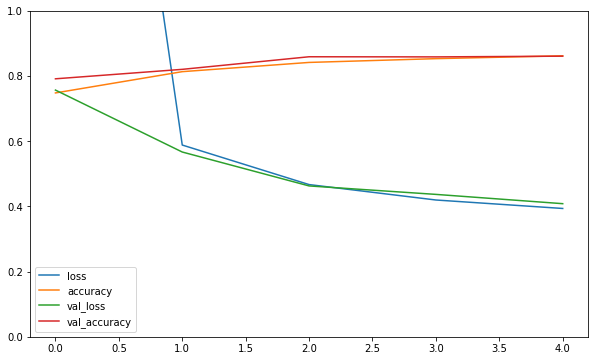

In [8]:
pd.DataFrame(history.history).plot(figsize= (10,6))
plt.gca().set_ylim(0,1)

In [9]:
hist_test = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.4638 - accuracy: 0.8435


['Ankle Boot', 'Pullover', 'Trouser']

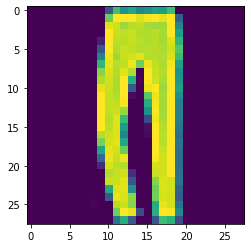

In [10]:
X_new = X_test[:3]
for img in X_new:
    plt.imshow(img.reshape(28,28))
preds = model.predict(X_new)
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
p = []
for pred in preds:
    p.append(np.argmax(pred))
for pred in p:
    pred = class_names[pred]

final = [class_names[i] for i in p]
final